### Collect data

In [216]:
import numpy as np
import pandas as pd

train_raw=pd.read_csv('data/train.csv')
test_raw=pd.read_csv('data/test.csv')

### Exploratory data

In [78]:
train_raw.shape

(891, 12)

In [79]:
test_raw.shape

(418, 11)

In [80]:
train_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
test_raw.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Dictionary

Survived: 0 or 1
pclass: 1=1st, 2=2nd, 3=3rd
sibSp: # of siblings
Parch: # of parent
Ticket: Ticket number
Cabin: Cabin number
Embarked: Port of embakation

In [83]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


As we can see, column Age, Cabin have various missing value.


In [84]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Test data also have missing data on Age, Cabin columns

In [85]:
train_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [86]:
test_raw.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Train data has 177, 687 missing values on Age, Cabin columns,respectively.
Similarly, Test data has 86 and 327 missing values on above columns

In [87]:
train_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From table above, we can see people is likely to be died, the average age is 28%.

In [88]:
train_raw['Sex'].value_counts()
su=train_raw[train_raw['Survived']==1]['Sex'].value_counts()
de=train_raw[train_raw['Survived']==0]['Sex'].value_counts()
[su,de]


[female    233
 male      109
 Name: Sex, dtype: int64, male      468
 female     81
 Name: Sex, dtype: int64]

The majority gender is male. 

### Explore data features

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [148]:
def barchart(feature):
    survived=train_raw[train_raw['Survived']==1][feature].value_counts()
    dead=train_raw[train_raw['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index=['survied', 'dead']
    df.plot(kind='bar')
    
    return df


,female,male
survied,233,109
dead,81,468


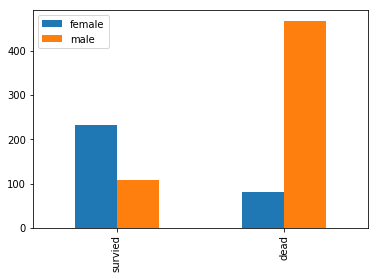

In [149]:
barchart('Sex')

As we can see, women is more likely survived than man

,1,2,3
survied,136,87,119
dead,80,97,372


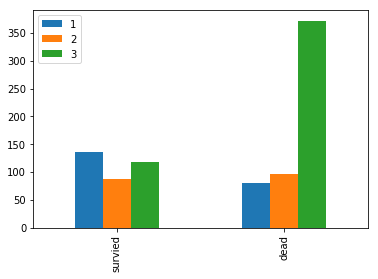

In [92]:
barchart('Pclass')

Class 1 is more likely survived than ohthers

,0,1,2,3,4,5,8
survied,210.0,112.0,13.0,4.0,3.0,NaN,NaN
dead,398.0,97.0,15.0,12.0,15.0,5.0,7.0


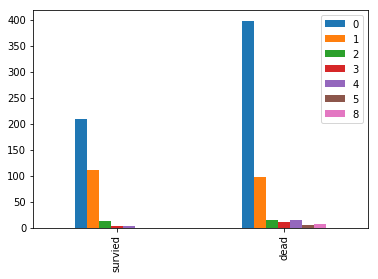

In [219]:
barchart('SibSp')

People have have more than 2 siblings are more likely to survived. 

,0,1,2,3,4,5,6
survied,233.0,65.0,40.0,3.0,NaN,1.0,NaN
dead,445.0,53.0,40.0,2.0,4.0,4.0,1.0


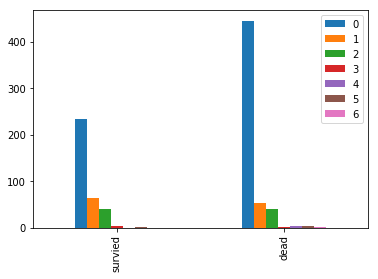

In [220]:
barchart('Parch')

Similarly, people who have mor than 2 parents are more likely survived. 

barchart('Embarked')

The Chart confirms a person aboarded from C slightly more likely survived
The Chart confirms a person aboarded from Q more likely dead
The Chart confirms a person aboarded from S more likely dead

### Data preprocessing

In [150]:
train_raw.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Name

Create a new column named 'Title' cotains title instead of full name of each person then delete the columns 'Name'

In [217]:
train_test_data = [train_raw, test_raw] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
del train_raw['Name']
del test_raw['Name']

In [218]:
train_raw.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [219]:
train_raw['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Don           1
Countess      1
Ms            1
Lady          1
Sir           1
Mme           1
Capt          1
Name: Title, dtype: int64

In [220]:
test_raw['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

Divide column 'Title' to 4 groups:
0 means Mr, 1 means Miss, 2 means Mirs, 3 means all another titles.  

In [221]:

for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map({'Mr':0, 'Miss':1, 'Mrs': 2})
train_raw['Title']=train_raw['Title'].fillna(3)
test_raw['Title']=test_raw['Title'].fillna(3)

In [222]:
train_raw.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,2.0


In [223]:
test_raw.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0
5,897,3,male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,female,30.0,0,0,330972,7.6292,NaN,Q,1.0
7,899,2,male,26.0,1,1,248738,29.0000,NaN,S,0.0
8,900,3,female,18.0,0,0,2657,7.2292,NaN,C,2.0
9,901,3,male,21.0,2,0,A/4 48871,24.1500,NaN,S,0.0


,0.0,1.0,2.0,3.0
survied,81,127,99,35
dead,436,55,26,32


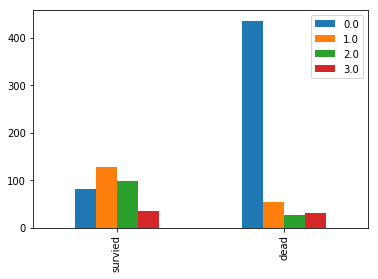

In [224]:
barchart('Title')

people who belong to group 1 are more likely survived.

### Sex

Mapping male: 0 and female:1

In [225]:
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map({'male':0, 'female':1})
    

In [226]:
train_raw.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


In [227]:
test_raw.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2.0


,0,1
survied,109,233
dead,468,81


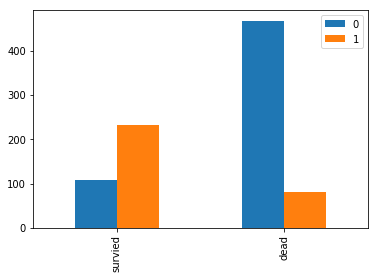

In [228]:
barchart('Sex')

### Age

Using median of each group in Tilte to fill all mssing value in Age.

In [229]:
train_raw["Age"].fillna(train_raw.groupby("Title")["Age"].transform("median"), inplace=True)
test_raw["Age"].fillna(test_raw.groupby("Title")["Age"].transform("median"), inplace=True)


In [230]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.6+ KB


In [231]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 36.0+ KB


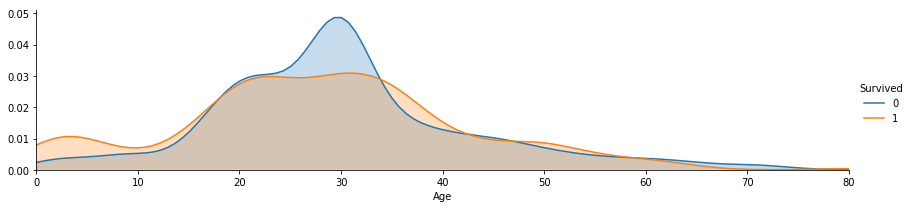

In [232]:
facet = sns.FacetGrid(train_raw, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_raw['Age'].max()))
facet.add_legend()
 
plt.show()

As we can see, people who are 25-30 years old are more likely survived than other.
We divide Age into 5 groups:
Group 0: Child (0-10 years old) 
Group 1: Young (10-25 years old)
Group 2: Adult (25-35 years old)
Group 3: Mid Age (35-50 years old)
Group 4: Senior (>50 years old)

In [233]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <10, 'Age'] = 0,
    dataset.loc[(dataset['Age'] >=10) & (dataset['Age'] < 25), 'Age'] = 1,
    dataset.loc[(dataset['Age'] >= 25) & (dataset['Age'] < 35), 'Age'] = 2,
    dataset.loc[(dataset['Age'] >= 35) & (dataset['Age'] <50), 'Age'] = 3,
    dataset.loc[ dataset['Age'] >= 50, 'Age'] = 4

In [234]:
train_raw.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,S,0.0


,0.0,1.0,2.0,3.0,4.0
survied,40,102,92,81,27
dead,27,150,228,97,47


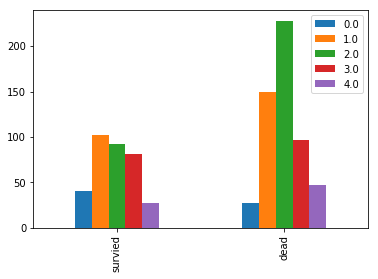

In [235]:
barchart('Age')

,S,C,Q
survied,217,93,30
dead,427,75,47


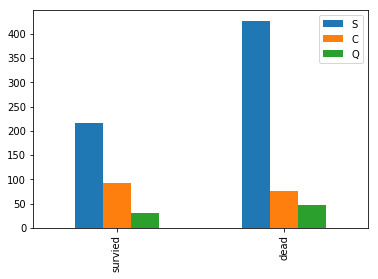

In [236]:
barchart('Embarked')

Check missing value.

In [237]:
train_raw['Embarked'].isnull().sum()

2

In [238]:
test_raw['Embarked'].isnull().sum()

0

As we can see, there are just two missing values on 'Embarket' columns. So we can drop it.

In [239]:
train_raw=train_raw.dropna(subset=['Embarked'])


In [240]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
Title          889 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 90.3+ KB


In [241]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 36.0+ KB


,S,C,Q
survied,217,93,30
dead,427,75,47


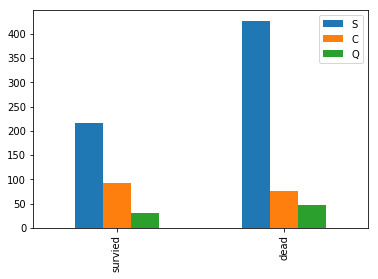

In [242]:
barchart('Embarked')

In [243]:
train_raw.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,0,4.0,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,1,1.0,1,0,237736,30.0708,NaN,C,2.0


In [244]:

train_raw['Embarked']=train_raw['Embarked'].map({'S':0, 'C':1, 'Q':2})
test_raw['Embarked']=test_raw['Embarked'].map({'S':0, 'C':1, 'Q':2})

/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [245]:
train_raw.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,0,0.0


### Fare

Fill missing data by median for each class

In [246]:
train_raw.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,0,0.0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0.0
6,7,0,1,0,4.0,0,0,17463,51.8625,E46,0,0.0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3.0
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2.0
9,10,1,2,1,1.0,1,0,237736,30.0708,NaN,1,2.0


In [247]:
train_raw["Fare"].fillna(train_raw.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_raw["Fare"].fillna(test_raw.groupby("Pclass")["Fare"].transform("median"), inplace=True)

/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [248]:
train_raw.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,0,0.0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0.0
6,7,0,1,0,4.0,0,0,17463,51.8625,E46,0,0.0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3.0
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2.0
9,10,1,2,1,1.0,1,0,237736,30.0708,NaN,1,2.0


In [249]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null int64
Title          889 non-null float64
dtypes: float64(3), int64(7), object(2)
memory usage: 90.3+ KB


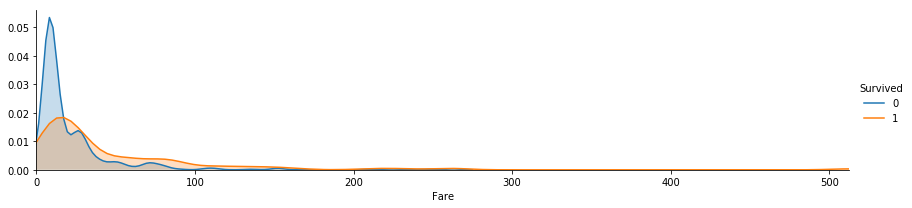

In [250]:
f=sns.FacetGrid(train_raw, hue='Survived',aspect=4)
f.map(sns.kdeplot, 'Fare', shade=True)
f.set(xlim=(0, train_raw['Fare'].max()))
f.add_legend()
plt.show()

Let's set xlim up to 20 to observe.

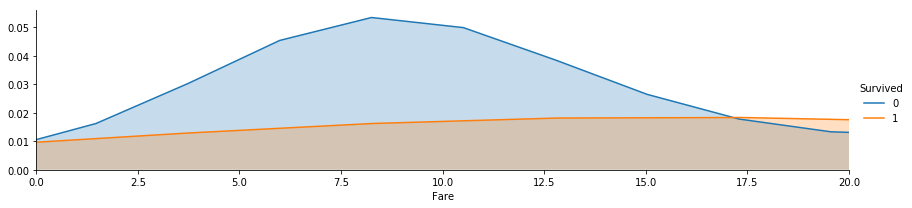

In [251]:
f=sns.FacetGrid(train_raw, hue='Survived',aspect=4)
f.map(sns.kdeplot, 'Fare', shade=True)
f.set(xlim=(0, 20))
f.add_legend()
plt.show()

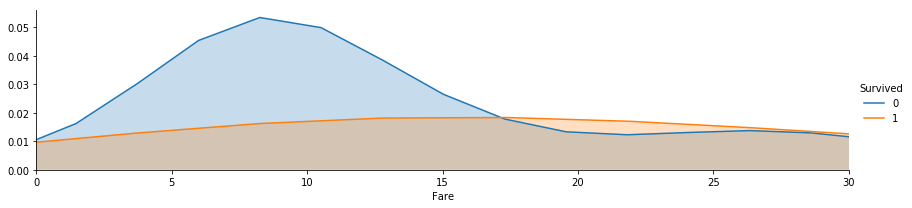

In [252]:
f=sns.FacetGrid(train_raw, hue='Survived',aspect=4)
f.map(sns.kdeplot, 'Fare', shade=True)
f.set(xlim=(0, 30))
f.add_legend()
plt.show()

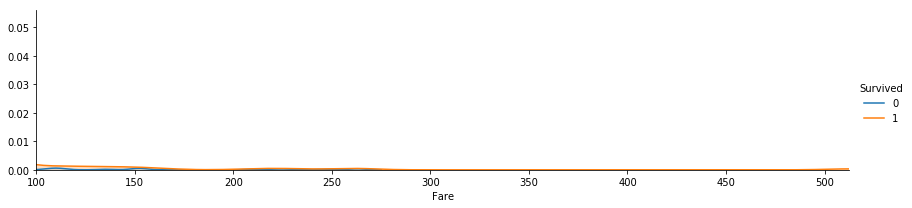

In [253]:
f=sns.FacetGrid(train_raw, hue='Survived',aspect=4)
f.map(sns.kdeplot, 'Fare', shade=True)
f.set(xlim=(100, train_raw['Fare'].max()))
f.add_legend()
plt.show()

Let's divide into 4 groups:

Group 0 (Fare<=17), Group 1 (17<Fare<=30), Group 2 (30<=Fare<100) and group 3 ( greater than 100)

In [254]:

train_raw.loc[ train_raw['Fare'] <= 17, 'Fare'] = 0,
train_raw.loc[(train_raw['Fare'] > 17) & (train_raw['Fare'] <= 30), 'Fare'] = 1,
train_raw.loc[(train_raw['Fare'] > 30) & (train_raw['Fare'] <= 100), 'Fare'] = 2,
train_raw.loc[ train_raw['Fare'] > 100, 'Fare'] = 3





/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [255]:
train_raw['Fare']

0      0.0
1      2.0
2      0.0
3      2.0
4      0.0
5      0.0
6      2.0
7      1.0
8      0.0
9      2.0
10     0.0
11     1.0
12     0.0
13     2.0
14     0.0
15     0.0
16     1.0
17     0.0
18     1.0
19     0.0
20     1.0
21     0.0
22     0.0
23     2.0
24     1.0
25     2.0
26     0.0
27     3.0
28     0.0
29     0.0
      ... 
861    0.0
862    1.0
863    2.0
864    0.0
865    0.0
866    0.0
867    2.0
868    0.0
869    0.0
870    0.0
871    2.0
872    0.0
873    0.0
874    1.0
875    0.0
876    0.0
877    0.0
878    0.0
879    2.0
880    1.0
881    0.0
882    0.0
883    0.0
884    0.0
885    1.0
886    0.0
887    1.0
888    1.0
889    1.0
890    0.0
Name: Fare, Length: 889, dtype: float64

In [256]:
test_raw.loc[ test_raw['Fare'] <= 17, 'Fare'] = 0,
test_raw.loc[(test_raw['Fare'] > 17) & (test_raw['Fare'] <= 30), 'Fare'] = 1,
test_raw.loc[(test_raw['Fare'] > 30) & (test_raw['Fare'] <= 100), 'Fare'] = 2,
test_raw.loc[ test_raw['Fare'] > 100, 'Fare'] = 3

In [257]:
test_raw['Fare']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      1.0
8      0.0
9      1.0
10     0.0
11     1.0
12     2.0
13     1.0
14     2.0
15     1.0
16     0.0
17     0.0
18     0.0
19     0.0
20     2.0
21     0.0
22     2.0
23     2.0
24     3.0
25     0.0
26     2.0
27     0.0
28     2.0
29     1.0
      ... 
388    0.0
389    1.0
390    2.0
391    2.0
392    1.0
393    0.0
394    1.0
395    2.0
396    0.0
397    2.0
398    0.0
399    0.0
400    3.0
401    1.0
402    2.0
403    2.0
404    1.0
405    0.0
406    0.0
407    3.0
408    0.0
409    0.0
410    0.0
411    2.0
412    0.0
413    0.0
414    3.0
415    0.0
416    0.0
417    1.0
Name: Fare, Length: 418, dtype: float64

In [258]:
train_raw.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2.0
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,1,3.0,1,0,113803,2.0,C123,0,2.0
4,5,0,3,0,3.0,0,0,373450,0.0,NaN,0,0.0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0.0
6,7,0,1,0,4.0,0,0,17463,2.0,E46,0,0.0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3.0
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2.0
9,10,1,2,1,1.0,1,0,237736,2.0,NaN,1,2.0


### Cabin

In [259]:
train_raw['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
C22 C26        3
F33            3
F2             3
E101           3
C83            2
C93            2
D36            2
F4             2
D35            2
C2             2
B58 B60        2
B49            2
B20            2
E67            2
B5             2
C68            2
F G73          2
B35            2
D33            2
C124           2
C123           2
C125           2
B18            2
E24            2
E44            2
C52            2
              ..
E12            1
C87            1
B94            1
E77            1
C32            1
B102           1
C106           1
B50            1
A19            1
E50            1
D7             1
A32            1
A34            1
D37            1
C50            1
E46            1
B37            1
C45            1
D47            1
C99            1
E31            1
E10            1
D19            1
D46            1
C47            1
E34            1
A31            1
C86           

Just need the first chacracter as a value.


In [260]:
train_raw['Cabin']=train_raw['Cabin'].str[0]
test_raw['Cabin']=test_raw['Cabin'].str[0]

/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [261]:
train_raw.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2.0
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,1,3.0,1,0,113803,2.0,C,0,2.0
4,5,0,3,0,3.0,0,0,373450,0.0,NaN,0,0.0


Plot a bar chart to observe.

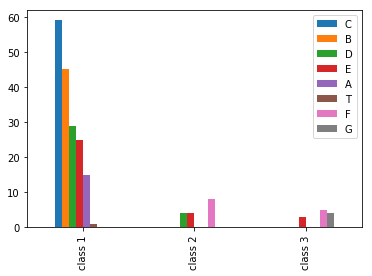

In [262]:
Pclass1=train_raw[train_raw['Pclass']==1]['Cabin'].value_counts()
Pclass2=train_raw[train_raw['Pclass']==2]['Cabin'].value_counts()
Pclass3=train_raw[train_raw['Pclass']==3]['Cabin'].value_counts()

df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['class 1', 'class 2', 'class 3']
df.plot(kind='bar')

In [263]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}

train_raw['Cabin'] = train_raw['Cabin'].map(cabin_mapping)
test_raw['Cabin'] = test_raw['Cabin'].map(cabin_mapping)

/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Fill missing Cabin with median cabin of each class

In [265]:
test_raw.head(15)



,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,2,0.0
1,893,3,1,3.0,1,0,363272,0.0,NaN,0,2.0
2,894,2,0,4.0,0,0,240276,0.0,NaN,2,0.0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,0,2.0
5,897,3,0,1.0,0,0,7538,0.0,NaN,0,0.0
6,898,3,1,2.0,0,0,330972,0.0,NaN,2,1.0
7,899,2,0,2.0,1,1,248738,1.0,NaN,0,0.0
8,900,3,1,1.0,0,0,2657,0.0,NaN,1,2.0
9,901,3,0,1.0,2,0,A/4 48871,1.0,NaN,0,0.0


In [266]:
train_raw["Cabin"].fillna(train_raw.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_raw["Cabin"].fillna(test_raw.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [267]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null float64
Embarked       889 non-null int64
Title          889 non-null float64
dtypes: float64(4), int64(7), object(1)
memory usage: 90.3+ KB


In [268]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null int64
Title          418 non-null float64
dtypes: float64(4), int64(6), object(1)
memory usage: 36.0+ KB


We see that wan can merge SibSp and	Parch to 1 fearture called Family-Size. Let's do it! 

In [269]:

train_raw['Family-size']=train_raw['SibSp']+train_raw['Parch']+1
test_raw['Family-size']=test_raw['SibSp']+test_raw['Parch']+1



/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [270]:
train_raw.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family-size
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,1
3,4,1,1,1,3.0,1,0,113803,2.0,0.8,0,2.0,2
4,5,0,3,0,3.0,0,0,373450,0.0,2.0,0,0.0,1


In [271]:
test_raw.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family-size
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0.0,1
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2.0,2
2,894,2,0,4.0,0,0,240276,0.0,2.0,2,0.0,1
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0.0,1
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2.0,3


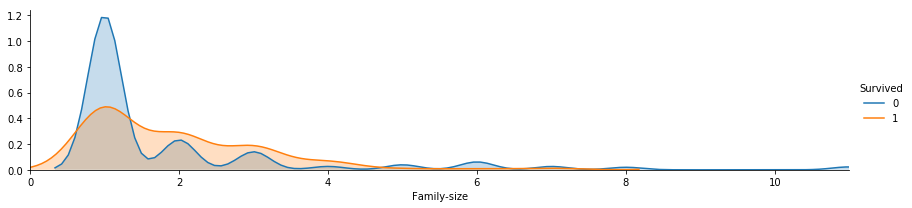

In [272]:
f=sns.FacetGrid(train_raw, hue='Survived',aspect=4)
f.map(sns.kdeplot, 'Family-size', shade=True)
f.set(xlim=(0,train_raw['Family-size'].max()))
f.add_legend()
plt.show()

Scale this feature to a fit range

In [273]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}

train_raw['Family-size'] = train_raw['Family-size'].map(family_mapping)
test_raw['Family-size'] = test_raw['Family-size'].map(family_mapping)

/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [274]:
train_raw.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family-size
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0,0.4
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,1,3.0,1,0,113803,2.0,0.8,0,2.0,0.4
4,5,0,3,0,3.0,0,0,373450,0.0,2.0,0,0.0,0.0


In [275]:
test_raw.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family-size
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0.0,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2.0,0.4
2,894,2,0,4.0,0,0,240276,0.0,2.0,2,0.0,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0.0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2.0,0.8


Finally, drop columns Ticket, SibSp and Parch

In [276]:
del train_raw['Ticket'], train_raw['SibSp'], train_raw['Parch']
del test_raw['Ticket'], test_raw['SibSp'], test_raw['Parch']

In [277]:
train_raw.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family-size
0,1,0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2.0,0.4
2,3,1,3,1,2.0,0.0,2.0,0,1.0,0.0
3,4,1,1,1,3.0,2.0,0.8,0,2.0,0.4
4,5,0,3,0,3.0,0.0,2.0,0,0.0,0.0


In [280]:
del train_raw['PassengerId']

In [281]:
train_raw.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family-size
0,0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,1,3.0,2.0,0.8,1,2.0,0.4
2,1,3,1,2.0,0.0,2.0,0,1.0,0.0
3,1,1,1,3.0,2.0,0.8,0,2.0,0.4
4,0,3,0,3.0,0.0,2.0,0,0.0,0.0


In [278]:
test_raw.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family-size
0,892,3,0,2.0,0.0,2.0,2,0.0,0.0
1,893,3,1,3.0,0.0,2.0,0,2.0,0.4
2,894,2,0,4.0,0.0,2.0,2,0.0,0.0
3,895,3,0,2.0,0.0,2.0,0,0.0,0.0
4,896,3,1,1.0,0.0,2.0,0,2.0,0.8


### Model


In [282]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
X=train_raw.drop('Survived', axis=1)
y=train_raw['Survived']

In [283]:
X


,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family-size
0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,3.0,2.0,0.8,1,2.0,0.4
2,3,1,2.0,0.0,2.0,0,1.0,0.0
3,1,1,3.0,2.0,0.8,0,2.0,0.4
4,3,0,3.0,0.0,2.0,0,0.0,0.0
5,3,0,2.0,0.0,2.0,2,0.0,0.0
6,1,0,4.0,2.0,1.6,0,0.0,0.0
7,3,0,0.0,1.0,2.0,0,3.0,1.6
8,3,1,2.0,0.0,2.0,0,2.0,0.8
9,2,1,1.0,2.0,1.8,1,2.0,0.4


In [284]:
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

### SVM

In [288]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf=SVC(kernel='rbf')
grid_values={'gamma':[0.001, 0.01, 0.05, 0.1, 1, 10,100], 'C':[0.001, 0.01, 0.05, 0.1, 1, 10,100]}

grid_clf_acc=GridSearchCV(clf, param_grid=grid_values, scoring='accuracy')
grid_clf_acc.fit(X, y)



print('Best parameter for SVM: ', grid_clf_acc.best_params_)
print('Grid best score: ', grid_clf_acc.best_score_)

/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter for SVM:  {'C': 1, 'gamma': 0.05}
Grid best score:  0.8256467941507312


### kNN

In [290]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
para={'n_neighbors': [i for i in range(1,20,1)],
     'weights':['uniform', 'distance'],
     'metric':['euclidean', 'manhattan']}
grid_clf_acc=GridSearchCV(clf, param_grid=para, scoring='accuracy')
grid_clf_acc.fit(X, y)



print('Best parameter for SVM: ', grid_clf_acc.best_params_)
print('Grid best score: ', grid_clf_acc.best_score_)

/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter for SVM:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Grid best score:  0.829021372328459


### Decision Tree

In [291]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
para={'max_depth':[i for i in range(1,20)]}
grid_clf_acc=GridSearchCV(clf, param_grid=para, scoring='accuracy')
grid_clf_acc.fit(X, y)



print('Best parameter for SVM: ', grid_clf_acc.best_params_)
print('Grid best score: ', grid_clf_acc.best_score_)

/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter for SVM:  {'max_depth': 6}
Grid best score:  0.8301462317210349


### Random Forest

In [292]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
para={'max_depth':[i for i in range(1,20)]}
grid_clf_acc=GridSearchCV(clf, param_grid=para, scoring='accuracy')
grid_clf_acc.fit(X, y)



print('Best parameter for SVM: ', grid_clf_acc.best_params_)
print('Grid best score: ', grid_clf_acc.best_score_)

/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/h

/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hoangnguyen/anacon

Best parameter for SVM:  {'max_depth': 4}
Grid best score:  0.8323959505061868


/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Testing

In [293]:
test=test_raw.drop('PassengerId',axis=1).copy()

In [294]:
test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family-size
0,3,0,2.0,0.0,2.0,2,0.0,0.0
1,3,1,3.0,0.0,2.0,0,2.0,0.4
2,2,0,4.0,0.0,2.0,2,0.0,0.0
3,3,0,2.0,0.0,2.0,0,0.0,0.0
4,3,1,1.0,0.0,2.0,0,2.0,0.8


In [295]:
clf=RandomForestClassifier(max_depth=4)
clf.fit(X,y)
prediction=clf.predict(test)

/home/hoangnguyen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [297]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [298]:
submission = pd.DataFrame({
        "PassengerId": test_raw["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [299]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
